In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#Load the data:
df=pd.read_csv('Customer_data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 1. Data Exploration And Preprocessing

In [6]:
df.info() #Basic information about data.
df.describe() #Summary statistics of the Data.
print("\nMissing Values:\n", df.isnull().sum())#Checking missing values in Data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [25]:
#Handling the Missing Values
# Load the dataset
df = pd.read_csv('Customer_data.csv')

# Drop 'customerID' if present
if 'customerID' in df.columns:
    df = df.drop('customerID', axis=1)

# Convert 'TotalCharges' to numeric (handles any bad data)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing TotalCharges
df = df.dropna(subset=['TotalCharges'])

# Convert 'Churn' to 0 and 1
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# One-hot encode categorical variables (drop first to avoid dummy variable trap)
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

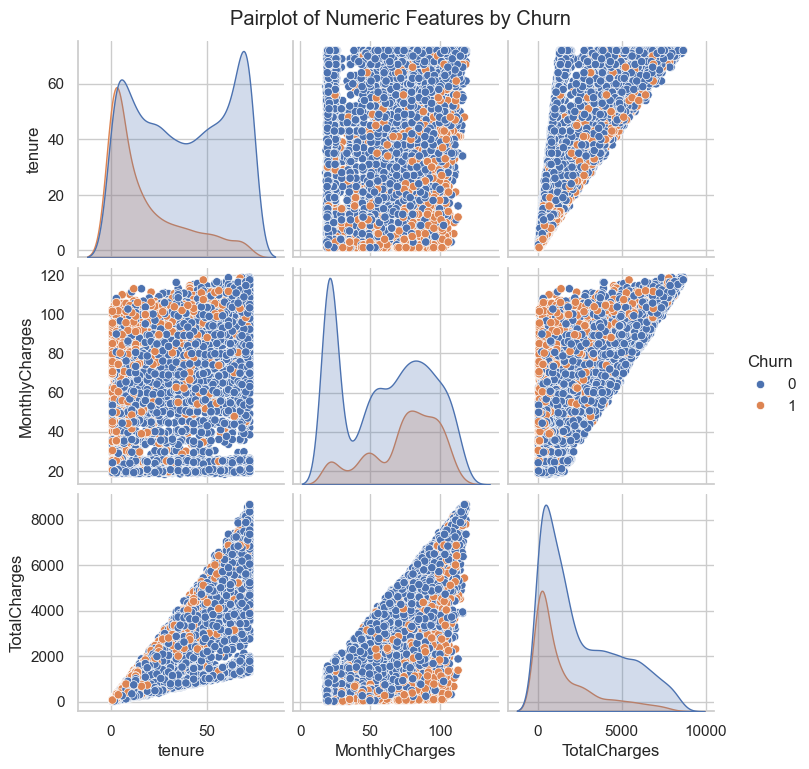

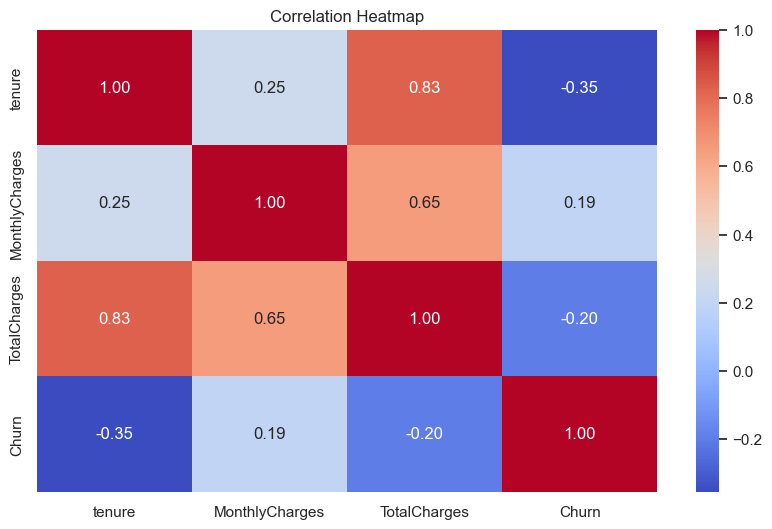

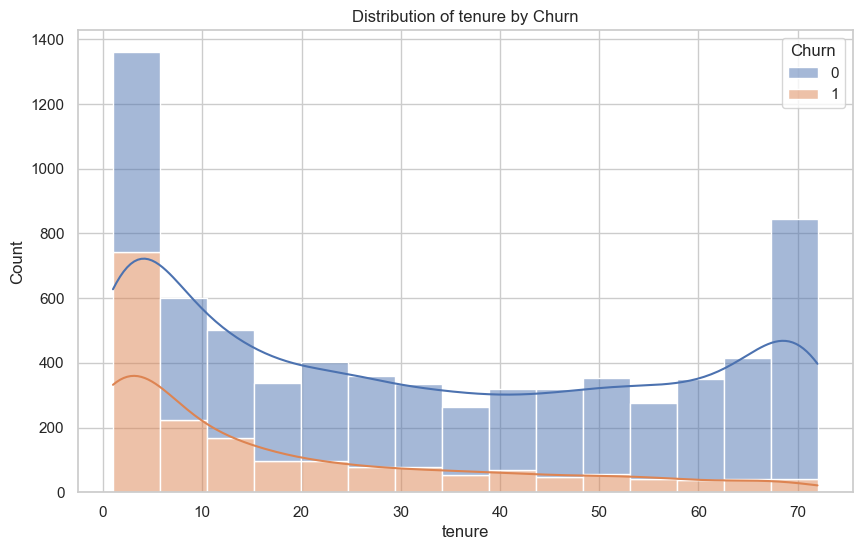

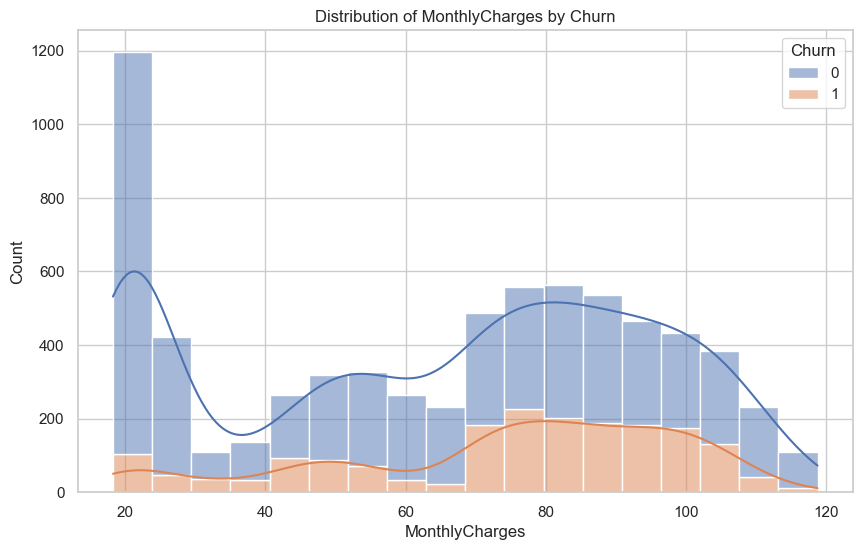

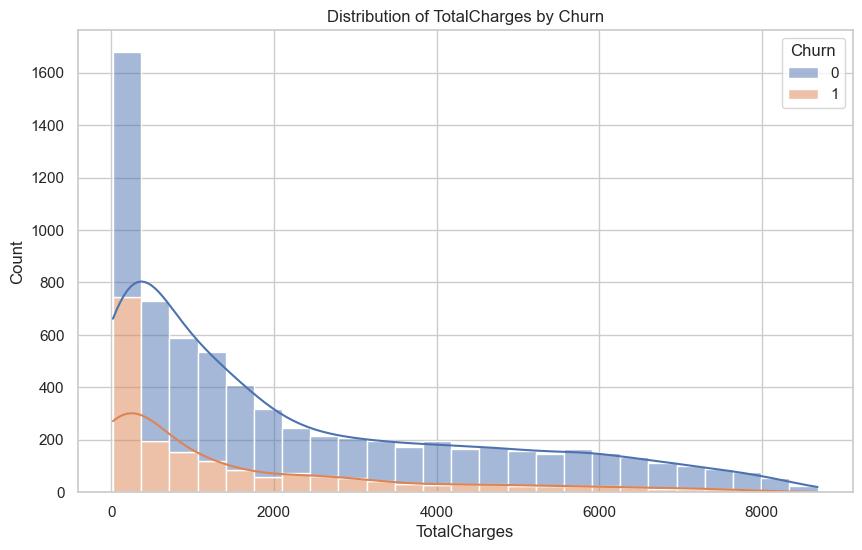

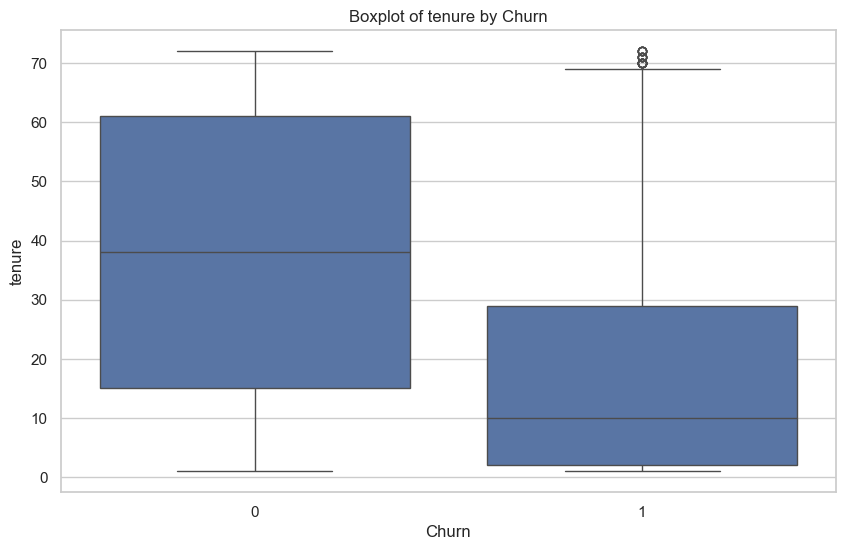

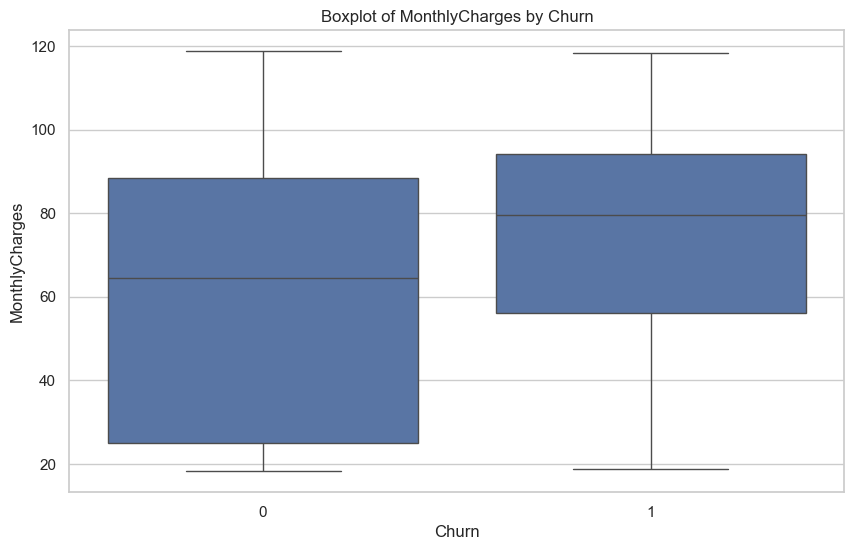

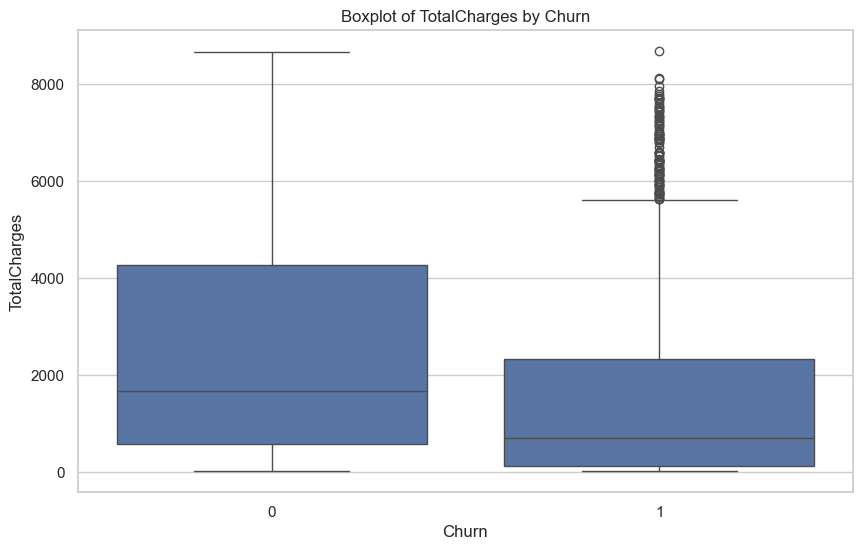

In [26]:
#Improve plot size and style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

#Select subset of numeric features
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Pairplot with Churn as hue
sns.pairplot(df[numeric_cols + ['Churn']], hue='Churn', diag_kind='kde')
plt.suptitle('Pairplot of Numeric Features by Churn', y=1.02)
plt.show()

#Compute correlation matrix
corr = df[numeric_cols + ['Churn']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#Histogram of indiviual features
for col in numeric_cols:
    sns.histplot(data=df, x=col, kde=True, hue='Churn', multiple='stack')
    plt.title(f'Distribution of {col} by Churn')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

#Box Plots to Check for Outliers
for col in numeric_cols:
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'Boxplot of {col} by Churn')
    plt.show()


# 2. Data Development:

In [30]:
#Define features and target
X = df.drop('Churn', axis=1) #Predictor
y = df['Churn'] #Traget

#Split the dataset into Training & Testing Set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create Train Logistic Regression model
logreg = LogisticRegression(max_iter=3000)
logreg.fit(X_train, y_train)

#Predictions
y_pred = logreg.predict(X_test)

# 3. Model Evaluation:

In [31]:
#Evaluate The Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7867803837953091
Precision: 0.6193548387096774
Recall: 0.5133689839572193
F1 Score: 0.5614035087719298

Confusion Matrix:
 [[915 118]
 [182 192]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

